# Homework 5
## Mike Henry

x1 -4.1390671431 779656031129.0
x2 -3.01926407057 568724149865.0
x3 3.00339626211 565735207637.0
x4 4.14375140863 780538383541.0


/Users/mikehenry/miniconda3/lib/python3.5/site-packages/matplotlib/mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/mikehenry/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


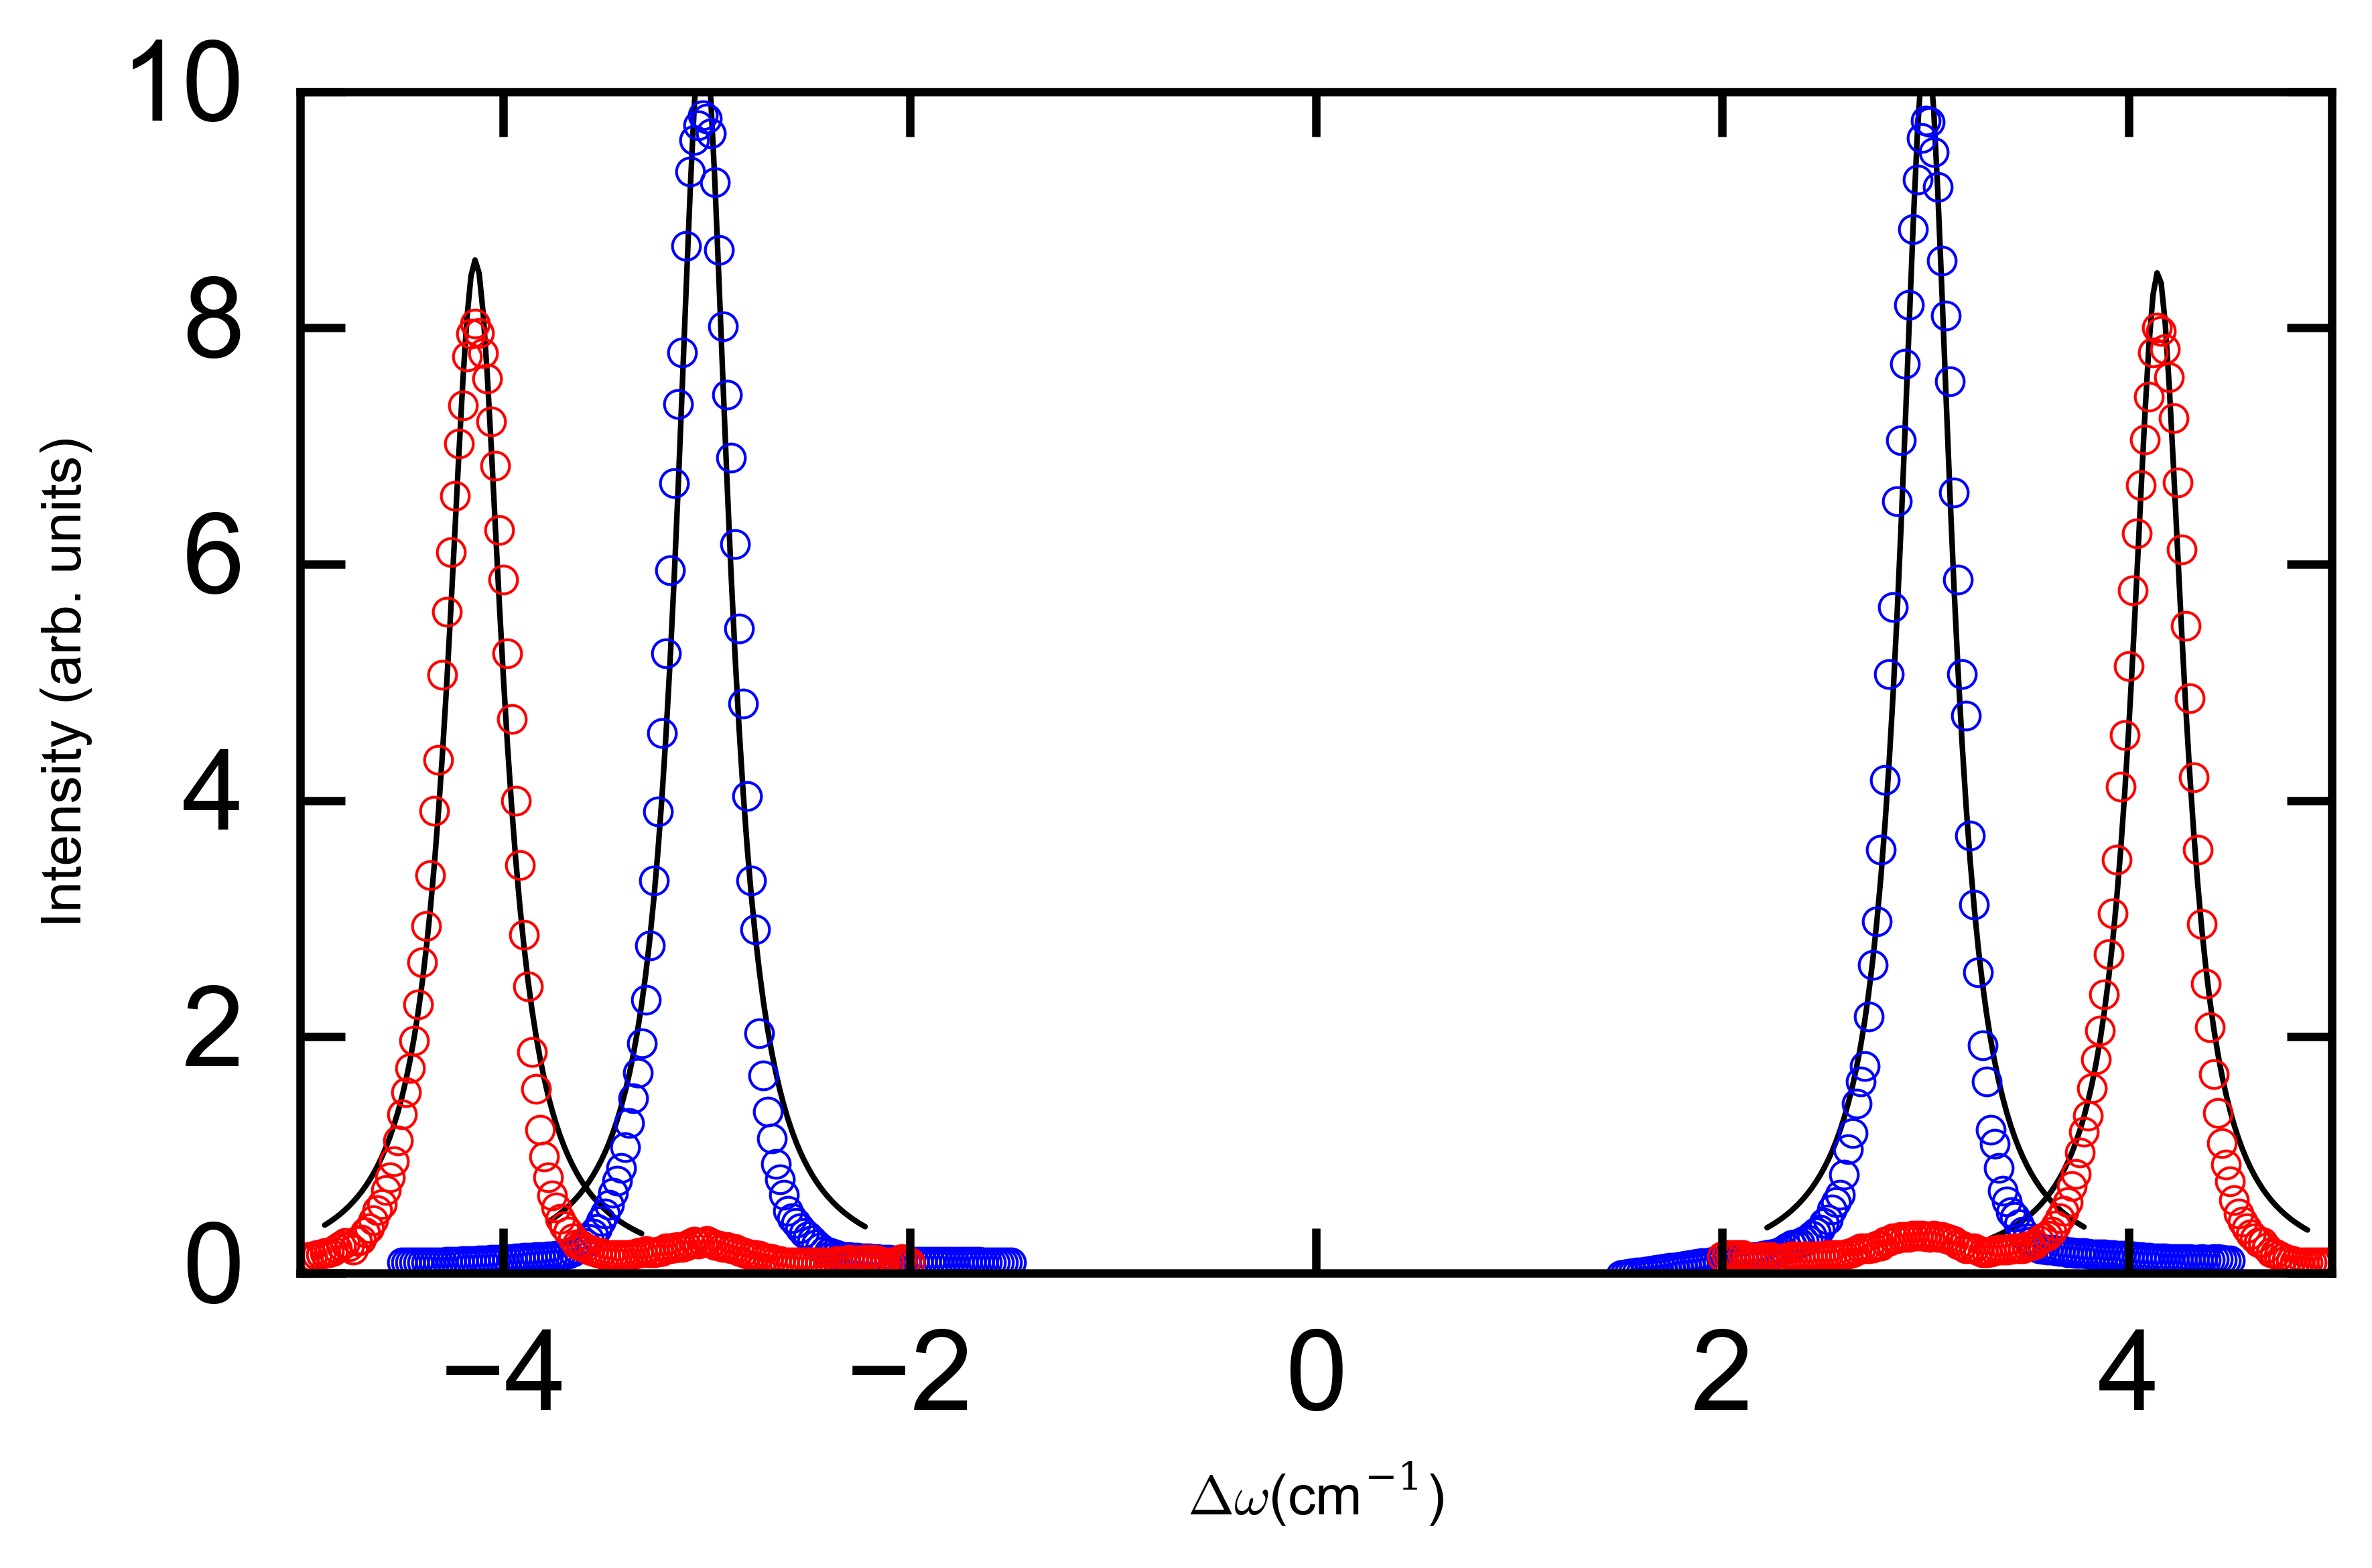

In [1]:
%matplotlib inline
import importlib as imp
import cf
from cf import *
imp.reload(cf)
x_r, y_r = load_data('Brillouin_data.csv')
x_r1, y_r1 = load_data_2('Brillouin_data.csv')

#Now we get our curve fits:

#First Peak
p0 = sy.array([5, 1, -4.1])
delta = 0.8
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
print("x1", popt[2], ang_freq_pho(abs(popt[2])))
plt.plot(x, y_fit, color='black', linewidth=1)

#Second Peak
p0 = sy.array([5, 1, -3])
delta = 0.8
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r, y_r)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
print("x2", popt[2], ang_freq_pho(abs(popt[2])))
plt.plot(x, y_fit, color='black', linewidth=1)

#Third Peak
p0 = sy.array([5, 1, 3])
delta = 0.8
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r, y_r)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
print("x3", popt[2], ang_freq_pho(abs(popt[2])))
plt.plot(x, y_fit, color='black', linewidth=1)

#Fourth Peak
p0 = sy.array([5, 1, 4.1])
delta = 0.8
peak_loc = p0[-1]
x, y = data_slice(delta, peak_loc, x_r1, y_r1)
popt, pcov = curve_fit(func_no_slope, x, y, p0)
y_fit = func_no_slope(x, *popt)
print("x4", popt[2], ang_freq_pho(abs(popt[2])))
plt.plot(x, y_fit, color='black', linewidth=1)

#Orignal Data
plt.xlabel(r"$\Delta\omega$(cm$^{-1}$)")
plt.ylabel("Intensity (arb. units)")
plt.xlim(-5,5)
plt.ylim(0,10)
plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='b', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
plt.plot(x_r1, y_r1, markerfacecolor='none', marker='o', color='r', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)


| Peak | Δω (cm^-1) | Ω (rad/s) |
|------|------------|------------|
| 1  |-4.139   |7.7966E+11 |
| 2  |-3.019   |5.6872E+11 |
| 3  | 3.003   |5.6574E+11 |
| 4  | 4.1437  |7.8054E+11 |

Scattering by TA phonons Δω: 3.011 (cm^-1) Ω: 5.6723E+11 (rad/s)

Scattering by LA phonons Δω: 4.141 (cm^-1) Ω: 7.8010E+11 (rad/s)

## 1b

We know k = 2 π/λ and q≈2k

In [41]:
q = (2*np.pi/488)*2
q

0.02575075945565404

q = 0.02575 nm^-1

We know that Ω = v*q so v = Ω/q

In [48]:
# Transverse
v = 5.6723E+11/(q*1e9)
'%.4E (m/s)' % v

'2.2028E+04 (m/s)'

In [49]:
# Longitudinal
v = 7.8010E+11/(q*1e9)
'%.4E (m/s)' % v

'3.0294E+04 (m/s)'

So the Transverse velocity is 2.2028E+04 (m/s) and the longitudinal velocity is 3.0294E+04 (m/s)

## 1c
We know that v_l = (C_11/ρ)^.5 and v_t = (C_44/ρ)^.5 so C_11 = v_l^2\*ρ and C_44 = v_t^2\*ρ

In [60]:
#C_11
'%.4E (Pa)' % float((3.0294E+04)**2*3.515*1e3)

'3.2258E+12 (Pa)'

In [62]:
#C_44
'%.4E (Pa)' % float((2.2028E+04)**2*3.515*1e3)

'1.7056E+12 (Pa)'

The elastic stiffness constant for C_11 is 3.22e12 (Pa) and for C_44 is 1.7e12 (Pa)


## Problem 2

Eg: 1.4232944917945927
A: 2.1091283133719684e+26


/Users/mikehenry/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


/Users/mikehenry/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


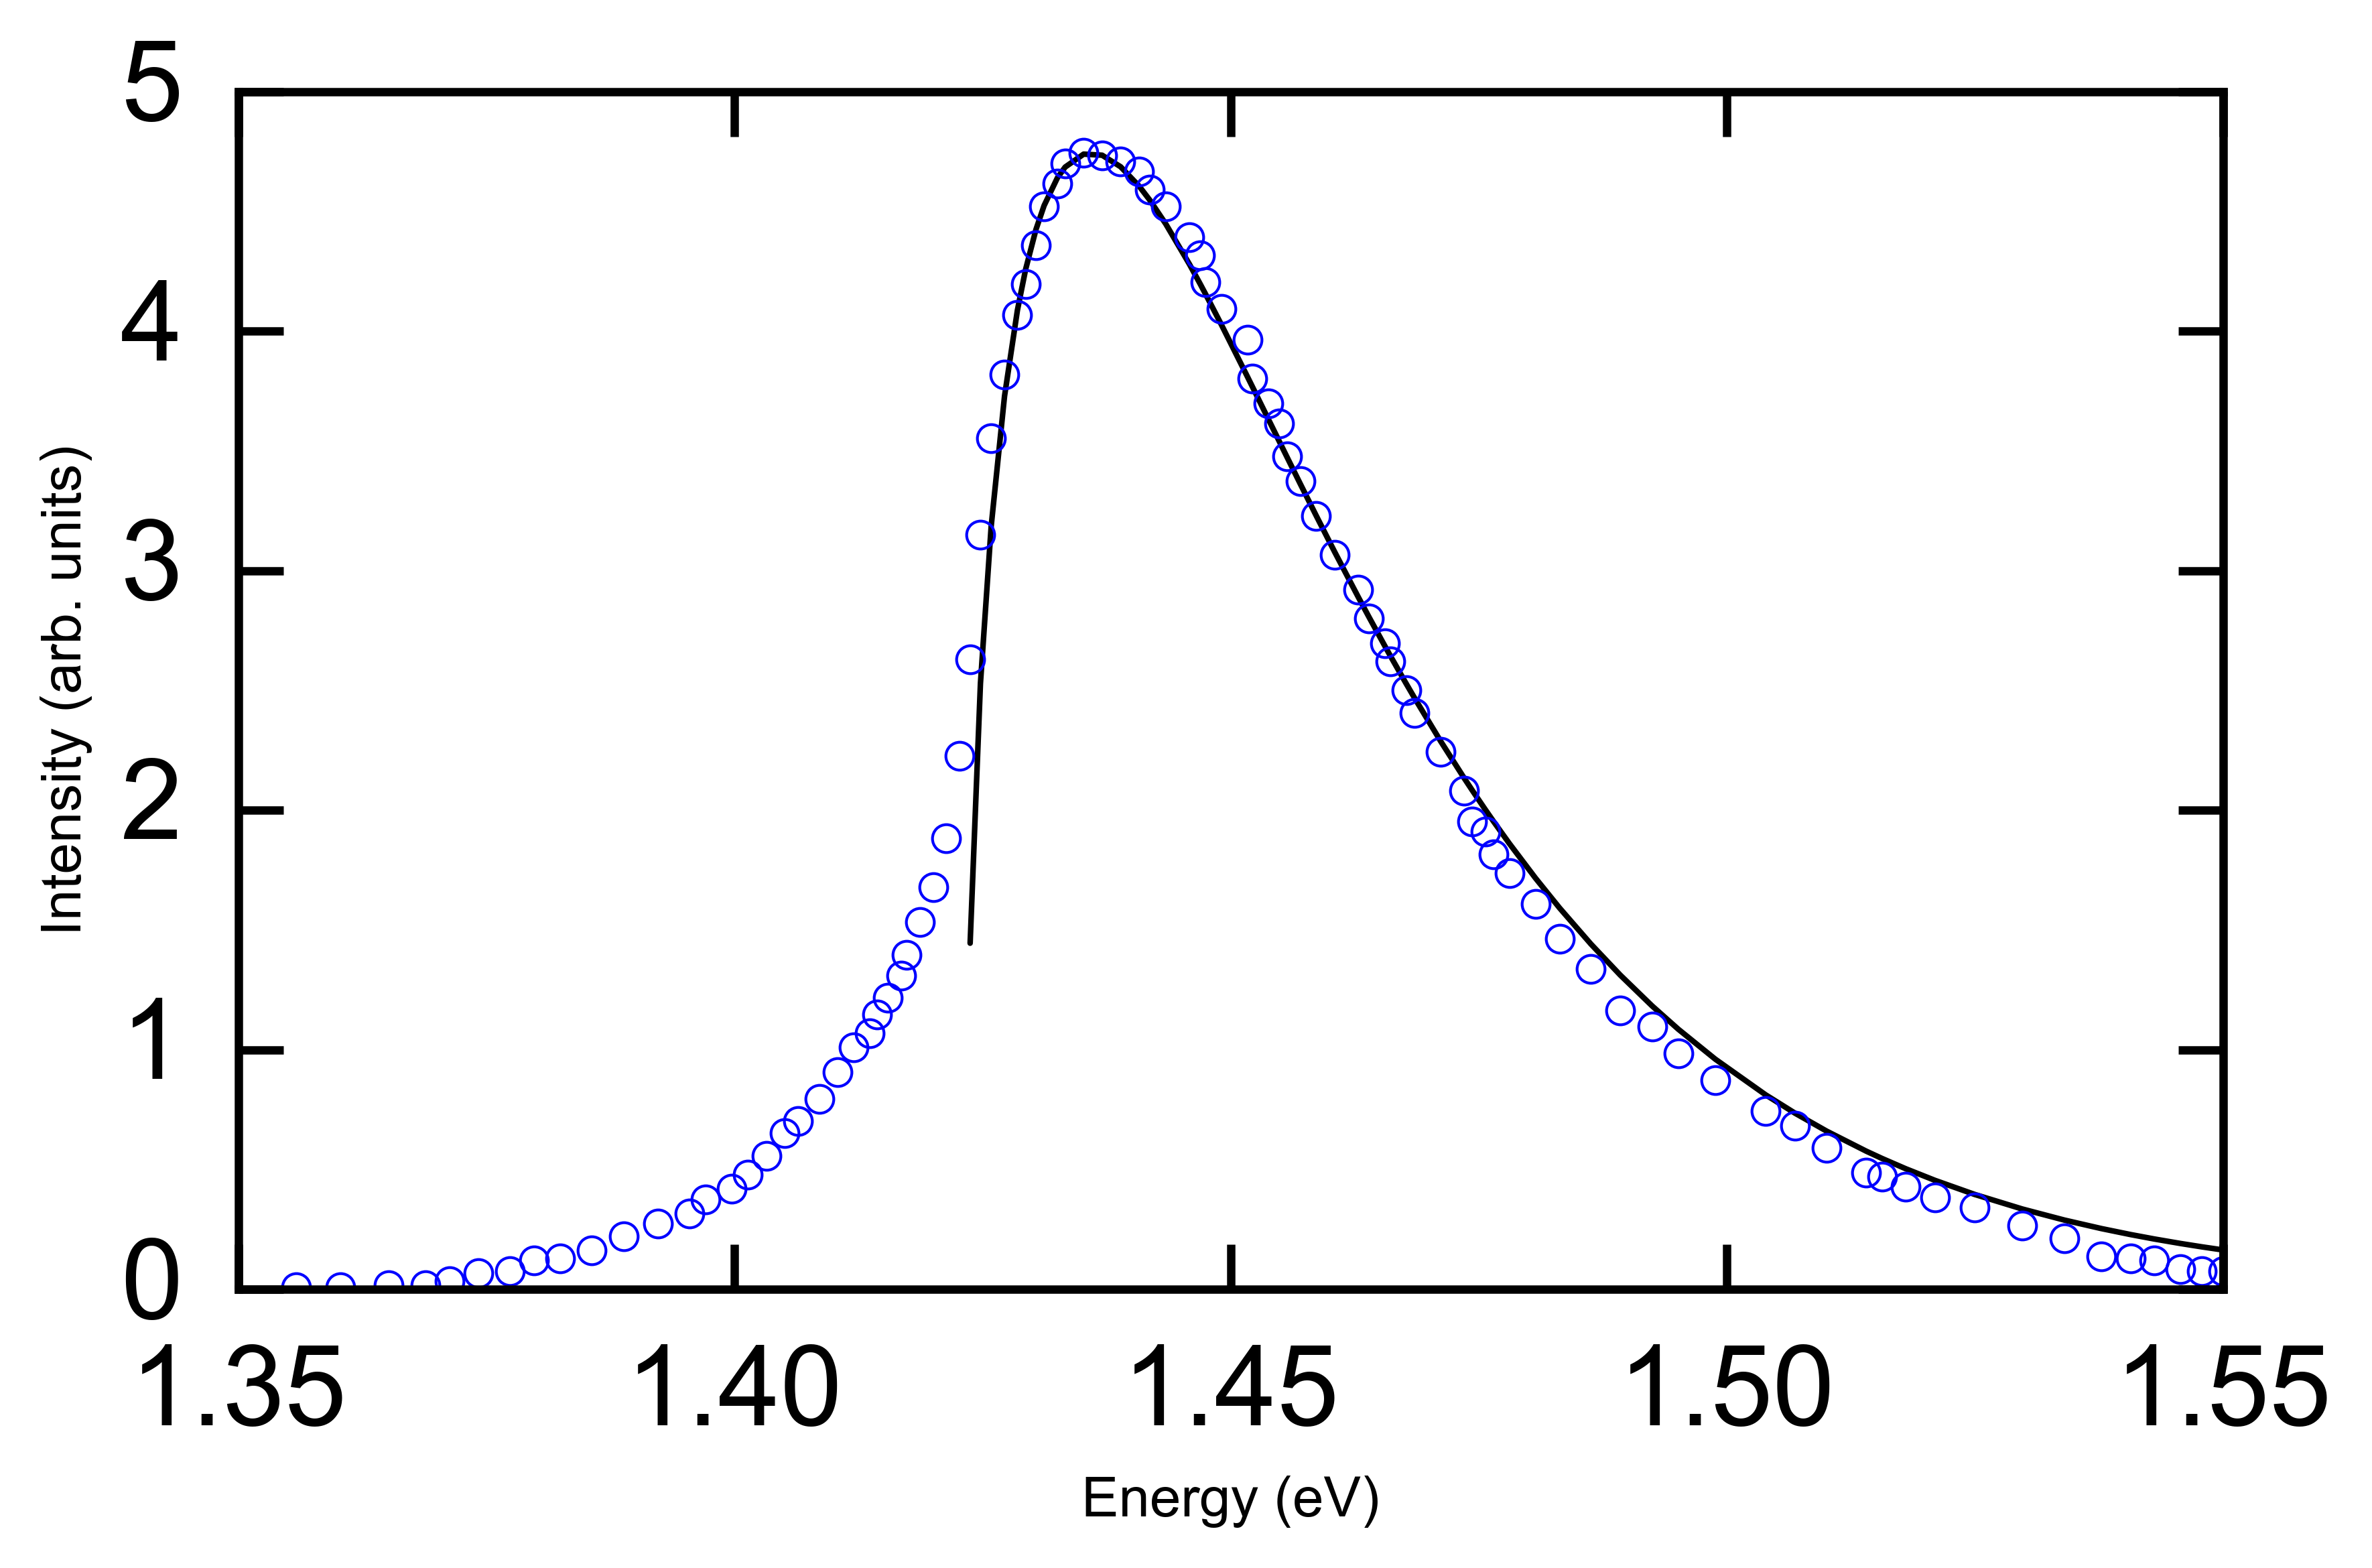

In [197]:
import numpy as np
def boltzman(E, Eg, A):
    k = 8.6173324e-5
    T = 293
    return A*np.sqrt(E-Eg)*np.exp(-E/(k*T))

x_r, y_r = load_data('PL_data-GaAs.csv')
x_r = 1240/x_r

#This flips our array arround so it goes from low to high E
x_r = x_r[::-1]
y_r = y_r[::-1]

#This will slice off the low energy tail
x_r_f = x_r[35:]
y_r_f = y_r[35:]

p0 = sy.array([1.0, 1e26])
popt, pcov = curve_fit(boltzman, x_r_f, y_r_f, p0, maxfev = 2000)
print("Eg: {}".format(popt[0]))
print("A: {}".format(popt[1]))
y_fit = boltzman(x_r, *popt)
plt.plot(x_r, y_fit, color='black', linewidth=1)

plt.xlabel(r"Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.xlim(1.35,1.55)
plt.ylim(0,5)
plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='b', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)


I found the bandgap to be 1.42 eV